In [ ]:
# !pip install yfinance
# !pip install "yfinance[optional]"

In [1]:
import datetime
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [9]:
# 지표 데이터 가져오기
stock_data = pd.read_excel('./data/index_Infomation_0630.xlsx')
stock_data['Date'] = pd.to_datetime(stock_data['Date'])
stock_data.head()

,Date,samsung_Close,apple_Close,dollar_to_won_Close,nasdaq_Close,snp500_Close,DJI_Close,KOSPI_Close,samsung_PER,samsung_PBR,apple_PER,apple_PBR,gold_Close,oil_Close
0,2014-01-01,0.0,0.000000,1054.80004,0.00000,0.00000,0.0000,0.00,0.00,0.00,0.000000,0.000000,0.00000,0.000000
1,2014-01-02,26180.0,19.754642,1050.75000,4143.06982,1831.97998,16441.3496,1967.19,8.50,1.90,2.730754,4.262052,1225.00000,107.779998
2,2014-01-03,25920.0,19.320715,1049.59997,4131.91015,1831.36999,16469.9902,1946.14,8.41,1.88,2.670770,4.168432,1238.40002,106.889999
3,2014-01-04,25920.0,19.320715,1049.59997,4131.91015,1831.36999,16469.9902,1946.14,8.41,1.88,2.670770,4.168432,1238.40002,106.889999
4,2014-01-05,25920.0,19.320715,1049.59997,4131.91015,1831.36999,16469.9902,1946.14,8.41,1.88,2.670770,4.168432,1238.40002,106.889999


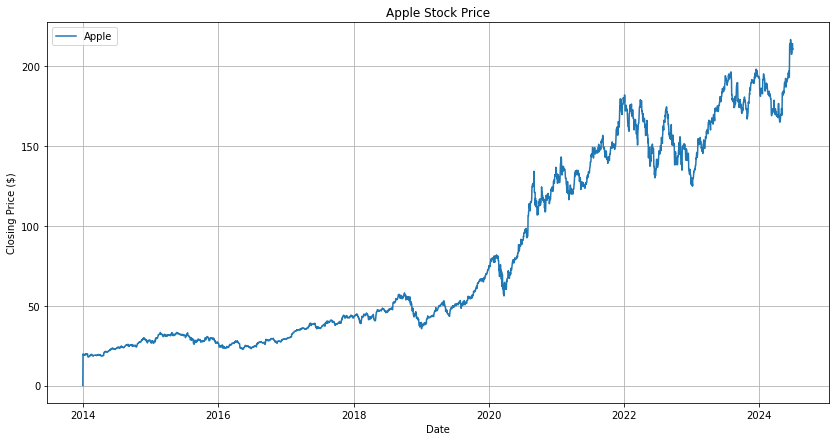

In [10]:
# 애플 주식 데이터 가져오기
# ticker = 'AAPL'
# apple = yf.Ticker(ticker)
# apple_df = apple.history(start='2014-01-01')
# apple_df.reset_index(inplace=True)
apple_df = stock_data[['Date', 'apple_Close']]

# 애플 주식 그래프 그리기
plt.figure(figsize=(14, 7))
plt.plot(apple_df['Date'], apple_df['apple_Close'], label='Apple')

plt.title('Apple Stock Price')
plt.xlabel('Date')
plt.ylabel('Closing Price ($)')
plt.legend()
plt.grid(True)

plt.show()

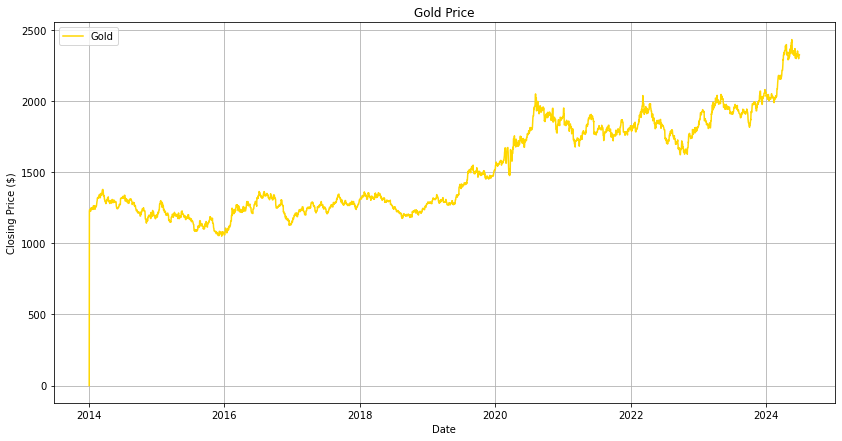

In [12]:
# 금 가격만 분할
gold_df = stock_data[['Date', 'gold_Close']]
# gold_df.loc[0, 'gold_Close'] = 1205.77
# gold_df

# 금 가격 그래프
plt.figure(figsize=(14, 7))
plt.plot(gold_df['Date'], gold_df['gold_Close'], label='Gold', color='gold')

plt.title('Gold Price')
plt.xlabel('Date')
plt.ylabel('Closing Price ($)')
plt.legend()
plt.grid(True)

plt.show()

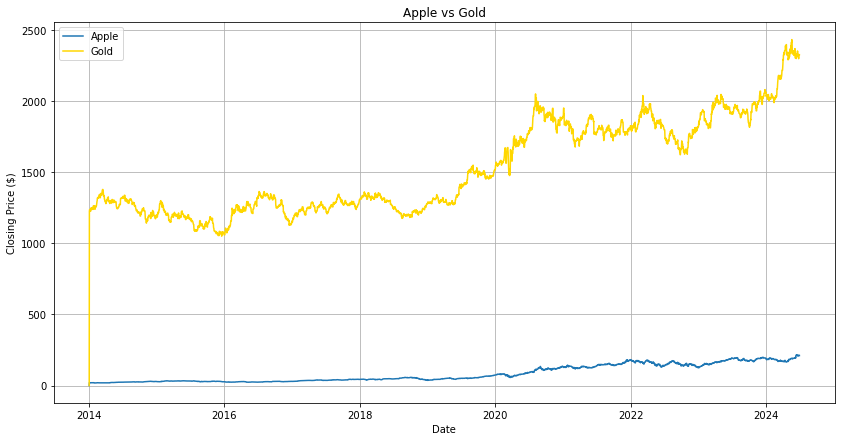

In [14]:
# 애플 주식과 금 가격 그래프
plt.figure(figsize=(14, 7))
plt.plot(apple_df['Date'], apple_df['apple_Close'], label='Apple')
plt.plot(gold_df['Date'], gold_df['gold_Close'], label='Gold', color='gold')

plt.title('Apple vs Gold')
plt.xlabel('Date')
plt.ylabel('Closing Price ($)')
plt.legend()
plt.grid(True)

plt.show()

In [15]:
# 0과 1 사이의 값으로 정규화
def normalize(df, column):
    return (df[column] - df[column].min()) / (df[column].max() - df[column].min())

In [ ]:
apple_normal_df = normalize(apple_df, 'apple_Close')
gold_normal_df = normalize(gold_df, 'gold_Close')

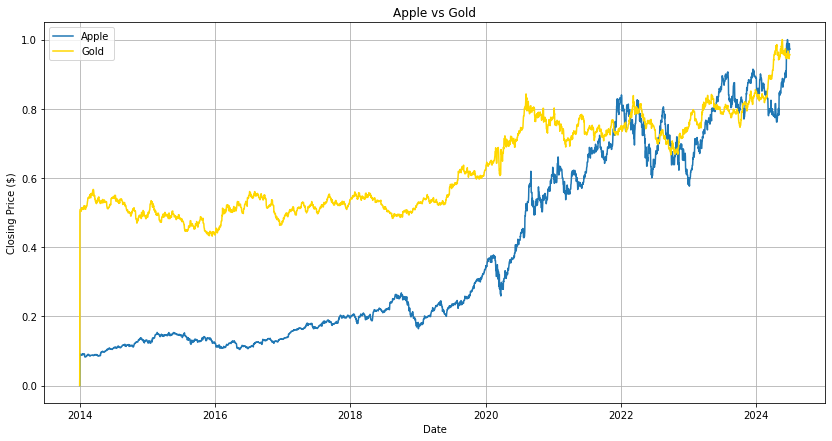

In [18]:
# 정규화 적용 애플 주식과 금 가격 그래프
plt.figure(figsize=(14, 7))
plt.plot(apple_df['Date'], apple_normal_df, label='Apple')
plt.plot(gold_df['Date'], gold_normal_df, label='Gold', color='gold')

plt.title('Apple vs Gold')
plt.xlabel('Date')
plt.ylabel('Closing Price ($)')
plt.legend()
plt.grid(True)

plt.show()

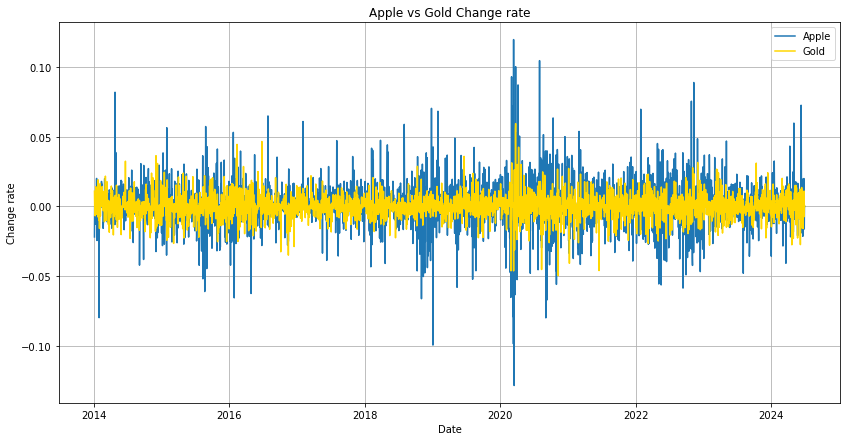

In [20]:
# 변동율 차이 비교

# 일간 변동률 계산 (판다스 함수 이용)  # shift(1) 이용하여 차이 게산도 가능
daily_change_apple_df = apple_df['apple_Close'].pct_change()
daily_change_gold_df = gold_df['gold_Close'].pct_change()

# 그래프화
plt.figure(figsize=(14, 7))
plt.plot(apple_df['Date'], daily_change_apple_df, label='Apple')
plt.plot(gold_df['Date'], daily_change_gold_df, label='Gold', color='gold')

plt.title('Apple vs Gold Change rate')
plt.xlabel('Date')
plt.ylabel('Change rate')
plt.legend()
plt.grid(True)

plt.show()

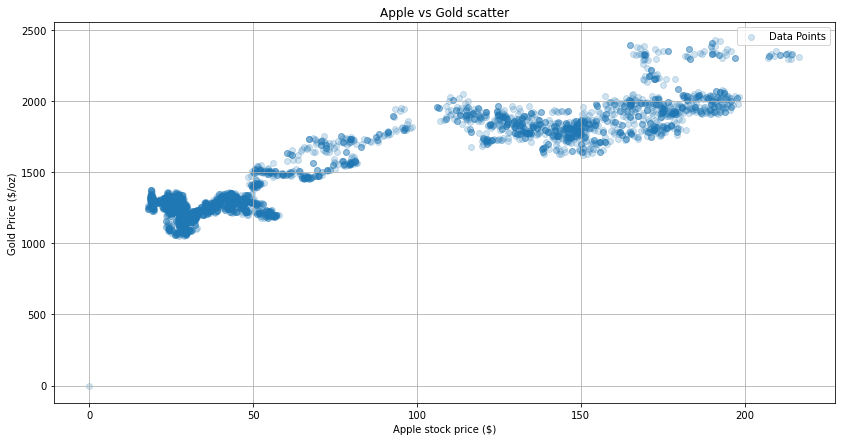

In [22]:
# 애플 주식과 금 값 데이터 병합

# 애플 Date컬럼 시간대 제거
# apple_df['Date'] = apple_df['Date'].dt.tz_localize(None)

merge_df = pd.merge(apple_df[['Date', 'apple_Close']], gold_df[['Date', 'gold_Close']], on='Date', how='inner')
# merged_df

# 산점도
plt.figure(figsize=(14, 7))
plt.scatter(merge_df['apple_Close'], merge_df['gold_Close'], alpha=0.2, label='Data Points')

# plt.xscale('log')  # X축에 로그 스케일 적용
# plt.yscale('log')  # Y축에 로그 스케일 적용

plt.title('Apple vs Gold scatter')
plt.xlabel('Apple stock price ($)')
plt.ylabel('Gold Price ($/oz)')
plt.legend()
plt.grid(True)

plt.show()

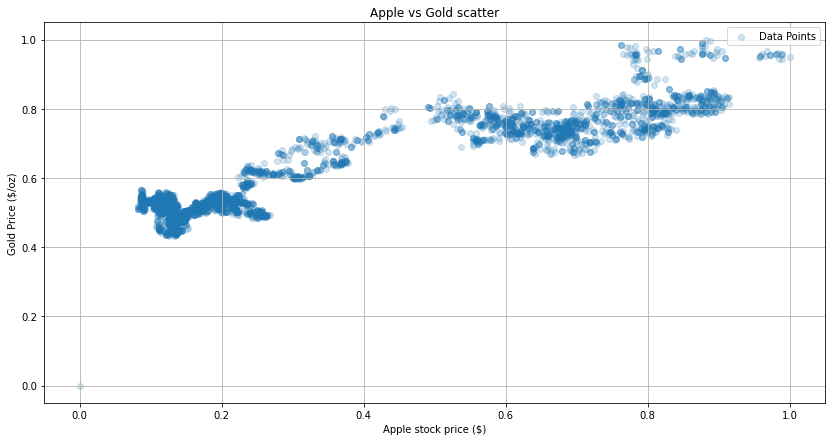

In [23]:
# 정규화 데이터 추가
merge_df['apple_normal'] = apple_normal_df
merge_df['gold_normal'] = gold_normal_df
# merge_df

# 산점도
plt.figure(figsize=(14, 7))
plt.scatter(merge_df['apple_normal'], merge_df['gold_normal'], alpha=0.2, label='Data Points')

plt.title('Apple vs Gold scatter')
plt.ylabel('Gold Price ($/oz)')
plt.xlabel('Apple stock price ($)')
plt.legend()
plt.grid(True)

plt.show()

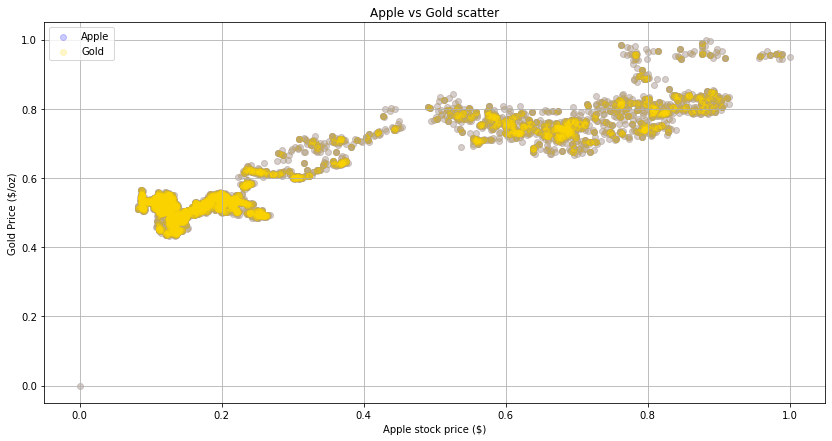

In [24]:
# 변동폭 데이터 추가
merge_df['apple_change_value'] = daily_change_apple_df
merge_df['gold_change_value'] = daily_change_gold_df
# merge_df

# 산점도
plt.figure(figsize=(14, 7))
plt.scatter(merge_df['apple_normal'], merge_df['gold_normal'], alpha=0.2, label='Apple', color='blue')
plt.scatter(merge_df['apple_normal'], merge_df['gold_normal'], alpha=0.2, label='Gold', color='gold')

plt.title('Apple vs Gold scatter')
plt.xlabel('Apple stock price ($)')
plt.ylabel('Gold Price ($/oz)')
plt.legend()
plt.grid(True)

plt.show()

In [26]:
# Calculate the correlation
correlation = merge_df['gold_Close'].corr(merge_df['apple_Close'])
print(f"Correlation between Gold Price and Apple Stock Price: {correlation:.2f}")

Correlation between Gold Price and Apple Stock Price: 0.93
